##  Convolutional Neural Networks in TensorFlow

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/5CNN2.png?alt=media&token=9b2ffe9a-bbe2-40e9-986f-2f47ef012b91" width="950" align="center"/>

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import datasets
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [40]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [41]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [42]:
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'deer',
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']

In [43]:
print("The shape of training images is:", train_images.shape)
print("The shape of training labels is:", train_labels.shape)

The shape of training images is: (50000, 32, 32, 3)
The shape of training labels is: (50000, 1)


In [44]:
print("The shape of test images is:", test_images.shape)
print("The shape of test labels is:", test_labels.shape)

The shape of test images is: (10000, 32, 32, 3)
The shape of test labels is: (10000, 1)


In [45]:
print("The label values range from:", np.min(train_labels), "to" ,np.max(train_labels))

The label values range from: 0 to 9


The pixel values range from: 0.0 to 1.0


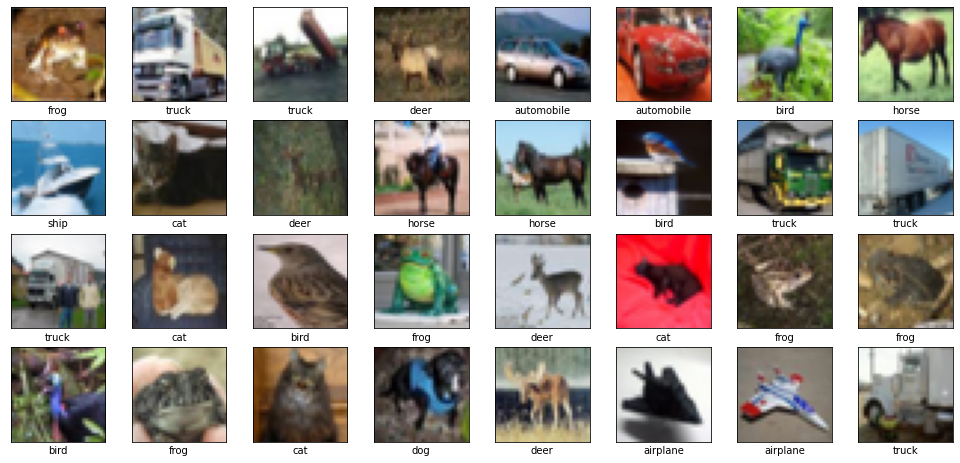

In [46]:
print("The pixel values range from:", np.min(train_images), "to" ,np.max(train_images))

plt.figure(figsize=(17,8))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [47]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

<img src="https://firebasestorage.googleapis.com/v0/b/deep-learning-crash-course.appspot.com/o/5CNN5.png?alt=media&token=17de648f-c844-4406-ba24-da83ce490e9d" width="950" align="center"/>

In [49]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation ='softmax'))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 flatten_3 (Flatten)         (None, 2048)             

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [52]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4814 - accuracy: 0.4631 - val_loss: 1.1906 - val_accuracy: 0.5820
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0650 - accuracy: 0.6261 - val_loss: 1.0082 - val_accuracy: 0.6441
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8884 - accuracy: 0.6899 - val_loss: 0.9020 - val_accuracy: 0.6911
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7904 - accuracy: 0.7249 - val_loss: 0.8919 - val_accuracy: 0.6950
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7057 - accuracy: 0.7543 - val_loss: 0.8520 - val_accuracy: 0.7082
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6384 - accuracy: 0.7765 - val_loss: 0.8368 - val_accuracy: 0.7137
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5788 - accuracy: 0.7983 - val_loss: 0.8367 - val_accuracy:

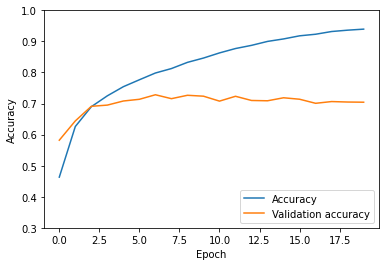

In [53]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

In [54]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', round(test_acc*100), '%')

313/313 - 1s - loss: 1.5546 - accuracy: 0.7043 - 889ms/epoch - 3ms/step
Test accuracy: 70 %


313/313 [==============================] - 1s 2ms/step


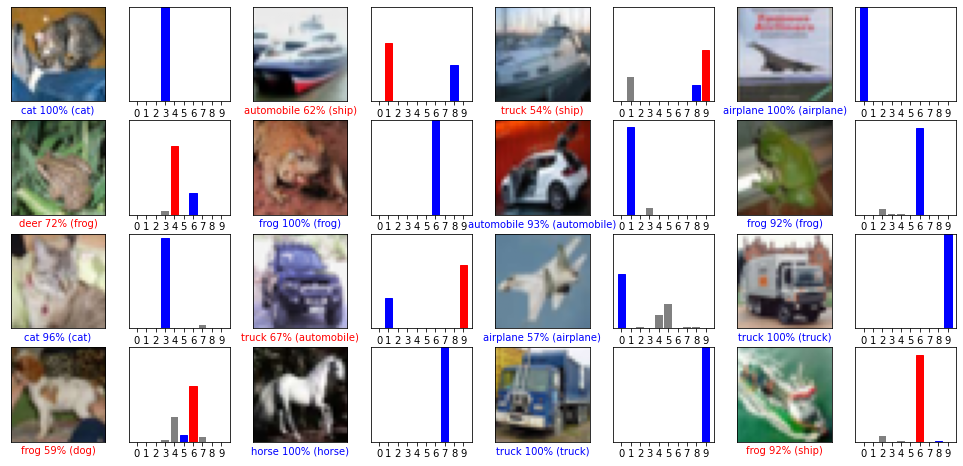

In [55]:
predictions = model.predict(test_images)

plt.figure(figsize=(17,8))

for i in range(16):
    plt.subplot(4,8,2*i+1)
    plt.xticks([])
    plt.yticks([])
    if np.argmax(predictions[i]) == test_labels[i][0]:
        color = 'blue'
    else:
        color = 'red'
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[i])],
                                100*np.max(predictions[i]),
                                class_names[test_labels[i][0]]),
                                color=color)
    plt.subplot(4,8,2*i+2)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="grey")
    plt.ylim([0, 1])  

    thisplot[np.argmax(predictions[i])].set_color('red')
    thisplot[test_labels[i][0]].set_color('blue')
    
plt.show()